In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.linear_model
import scipy.stats
import sklearn.model_selection
# %matplotlib notebook

In [2]:
df = pd.read_csv('data_contamine.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,0.223773,2.407005,-0.536073,-1.336626,-0.097947,1.549540,1.590890,1.190101,-1.181936,2.731036,...,-1.157572,-0.316955,-1.041194,-0.929746,-1.779339,-1.429081,2.685259,0.953334,-0.564672,151.0
1,-0.515789,-0.799958,1.582195,-0.008126,0.414271,1.363709,-0.098582,-0.302917,-0.544602,-0.241896,...,0.241794,-0.937335,0.288955,-0.177624,0.084456,0.633965,1.052004,-0.113860,0.505908,75.0
2,0.023454,0.048646,0.224159,0.655717,-0.176065,1.605403,1.638630,-1.240650,2.100396,-1.031570,...,0.483655,0.869513,0.881769,-0.958674,1.880679,0.608850,-0.057137,-0.950829,-0.594289,141.0
3,0.892292,-0.494714,-1.062153,0.736429,-0.118200,-1.078412,-0.454316,-0.378080,2.679422,-0.051751,...,0.385350,-0.021720,0.863478,0.256292,0.293780,0.216499,-0.637889,-1.179666,-1.112571,206.0
4,-1.021634,-1.805761,0.082164,0.387965,-0.838219,1.596253,0.037945,-1.012175,1.632963,-0.533814,...,0.661239,0.329027,-0.757433,0.082726,0.267892,0.282614,-2.022049,-2.201643,0.786962,135.0


### Question 1

In [3]:
print(f'Nombre de variables explicatives : {len(df.columns) - 1}')
print(f'Nombre d\'observations :  {len(df)}')

Nombre de variables explicatives : 160
Nombre d'observations :  442


### Question 2

In [4]:
print(f'Les variables explicatives sont centrées : {np.allclose(df.iloc[:, :-1].mean(), 0)}')
print(f'Les variables explicatives sont normalisées : {np.allclose(df.iloc[:, :-1].std(), 1, atol=1e-02)}')
print(f'Variable à expliquer - Moyenne : {df.iloc[:, -1].mean()} | Ecart-type : {df.iloc[:, -1].std()}')
print(f'La variable à expliquer n\'est ni centrée ni normalisée')

Les variables explicatives sont centrées : True
Les variables explicatives sont normalisées : True
Variable à expliquer - Moyenne : 152.13348416289594 | Ecart-type : 77.09300453299109
La variable à expliquer n'est ni centrée ni normalisée


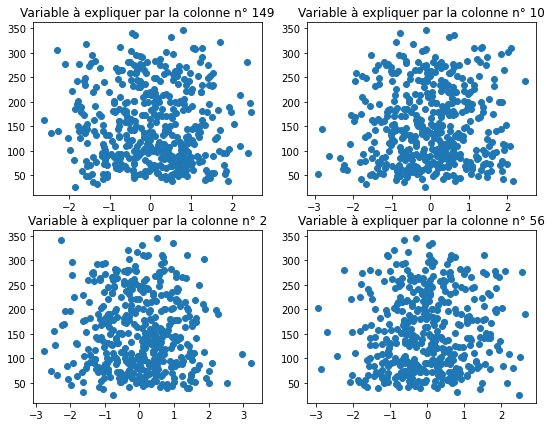

In [5]:
chosen_var = np.random.choice(df.columns[:-1], 4)
plt.figure(1, figsize=(9, 7))
for ind, col in enumerate(chosen_var):
    plt.subplot(2, 2, ind+1)
    plt.title(f'Variable à expliquer par la colonne n° {col}')
    plt.scatter(df.loc[:, col], df.iloc[:, -1])

### Question 3

In [6]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.25, random_state=1)
print(f'Taille des dataset train et set : {X_train.shape} et {X_test.shape}')
print(f'Les variables explicatives sont centrées : {np.allclose(X_train.mean(), 0)}')
print(f'Les variables explicatives sont normalisées : {np.allclose(X_train.std(), 1, atol=1e-02)}')

Taille des dataset train et set : (331, 160) et (111, 160)
Les variables explicatives sont centrées : False
Les variables explicatives sont normalisées : False


### Question 4

In [7]:
covX_train = X_train.cov()

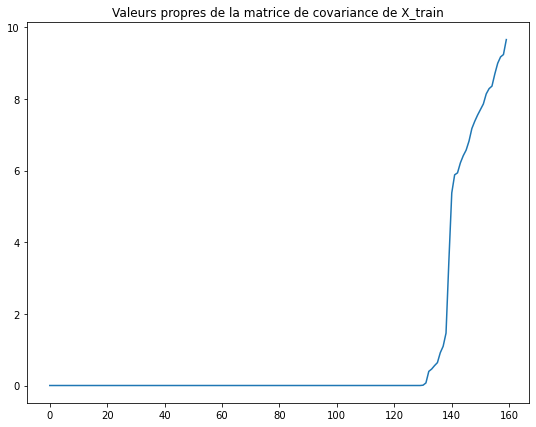

In [8]:
eig_values, eig_vectors = np.linalg.eigh(covX_train)
plt.figure(2, figsize=(9, 7))
plt.title('Valeurs propres de la matrice de covariance de X_train')
plt.plot(eig_values)

### Question 5

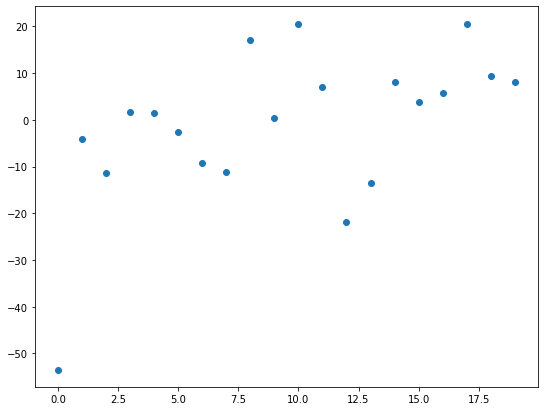

In [9]:
chosen_eigvect = eig_vectors[-20:].T
projectX_train = X_train @ chosen_eigvect
reg_pca = sklearn.linear_model.LinearRegression().fit(projectX_train, y_train)
plt.figure(3, figsize=(9, 7))
plt.scatter([np.arange(len(reg_pca.coef_))], reg_pca.coef_)
plt.show()

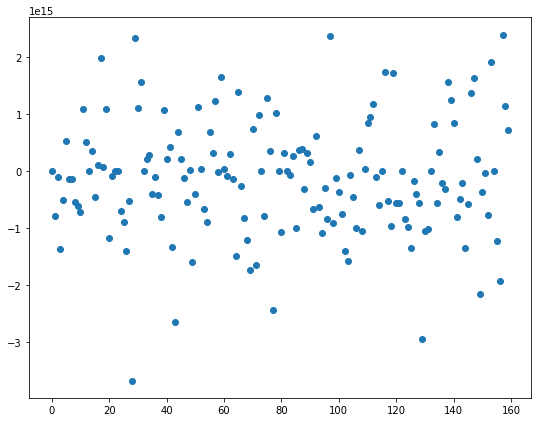

In [10]:
reg = sklearn.linear_model.LinearRegression().fit(X_train, y_train)
plt.figure(4, figsize=(9, 7))
plt.scatter([np.arange(len(reg.coef_))], reg.coef_)
plt.show()

### Question 6

In [11]:
print(f'La valeur moyenne de y_train est : {y_train.mean()}')
print(f'Méthode OLS | Valeur de l\'intercept : {reg.intercept_}')
print(f'Méthode PCA before OLS | Valeur de l\'intercept : {reg_pca.intercept_}')
print(f'Les deux intercept sont-ils égaux ? Réponse : {np.isclose(reg.intercept_, reg_pca.intercept_)}')

La valeur moyenne de y_train est : 153.65558912386706
Méthode OLS | Valeur de l'intercept : 150.56183912386706
Méthode PCA before OLS | Valeur de l'intercept : 153.24893190477667
Les deux intercept sont-ils égaux ? Réponse : False


In [12]:
normprojectX_train = (projectX_train - projectX_train.mean(axis=0)) / projectX_train.std(axis=0)
reg_pcanorm = sklearn.linear_model.LinearRegression().fit(normprojectX_train, y_train)
print(f'L\'intercept pour la méthode PCA before OLS centrée et normalisée est égale à la moyenne de Y_train : {np.isclose(reg_pcanorm.intercept_, y_train.mean())}')

L'intercept pour la méthode PCA before OLS centrée et normalisée est égale à la moyenne de Y_train : True


### Question 7

In [13]:
projectX_test = X_test @ chosen_eigvect

residual = y_test.values - reg.predict(X_test)
residual_pca = y_test.values - reg_pca.predict(projectX_test)

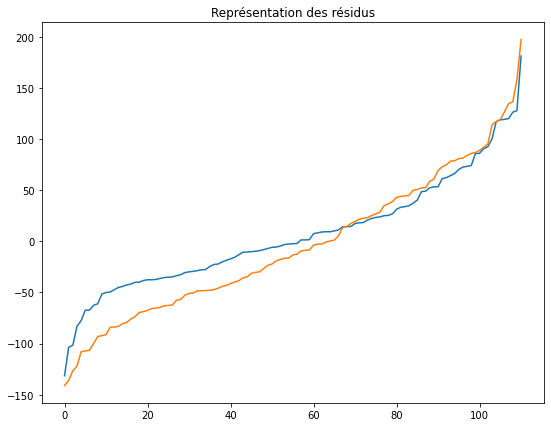

In [14]:
plt.figure(5, figsize=(9, 7))
plt.plot(np.sort(residual), label='Méthode OLS')
plt.plot(np.sort(residual_pca), label='Méthode PCA before OLS')
plt.title('Représentation des résidus')
plt.show()

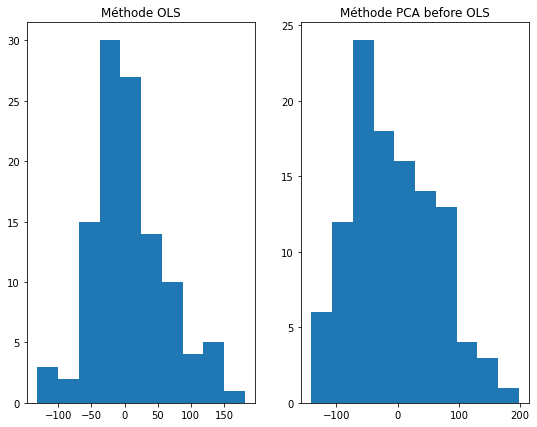

In [15]:
plt.figure(6, figsize=(9, 7))
plt.subplot(1, 2, 1)
plt.title('Méthode OLS')
plt.hist(residual)
plt.subplot(1, 2, 2)
plt.title('Méthode PCA before OLS')
plt.hist(residual_pca)
plt.show()

In [16]:
print(f'Méthode OLS | Valeur du coefficien de détermination : {reg.score(X_test, y_test)}')
print(f'Méthode PCA before OLS | Valeur du coefficien de détermination : {reg_pca.score(projectX_test, y_test)}')

print(f'Méthode OLS | Valeur du risque : {np.sum((residual) ** 2) / len(y_test)}')
print(f'Méthode PCA before OLS | Valeur du risque : {np.sum((residual_pca) ** 2) / len(y_test)}')

Méthode OLS | Valeur du coefficien de détermination : 0.4164151829111381
Méthode PCA before OLS | Valeur du coefficien de détermination : 0.051525104157796986
Méthode OLS | Valeur du risque : 3046.989686540263
Méthode PCA before OLS | Valeur du risque : 4952.13915946255


### Question 8

In [17]:
def get_residual_var(Y, X, reg):
    return np.sum((Y - reg.predict(X)) ** 2) / (len(X) - 1)


def get_ttest(Y, X, reg):
    return np.sqrt(len(X)) * reg.coef_[0] / np.sqrt((get_residual_var(Y=Y, X=X, reg=reg)))

    
def get_pvalue(Y, X, reg):
    return 2 * scipy.stats.t.sf(x=np.abs(get_ttest(Y=Y, X=X, reg=reg)), df=(len(X)-1))

In [18]:
def forward_var_select(Y, X, K):
    num_var = []
    for k in range(K):
        dict_pvalue = {}
        for i in range(X.shape[1]):
            if i not in num_var:
                reg = sklearn.linear_model.LinearRegression(fit_intercept=False).fit(X[:, i].reshape(-1, 1), Y.reshape(-1, 1))
                dict_pvalue[i] = get_pvalue(Y=Y.reshape(-1, 1), X=X[:, i].reshape(-1, 1), reg=reg)
        num_var.append(min(dict_pvalue, key=dict_pvalue.get))
    return num_var

In [19]:
true_forward_var = [22, 82, 23, 132, 154, 79, 115, 73, 122, 13]
forward_var = forward_var_select(Y=df.iloc[:, -1].values, X=df.iloc[:, :-1].values, K=10)
forward_intersect_var = list(set(forward_var).intersection(true_forward_var))

print(f'Le jeu initial contenait les variables {true_forward_var}.')
print(f'Pour K = 10, la méthode forward a trouvé les suivantes : {forward_var}.')
print(f'Parmi le jeu initial, la méthode forward a retrouvé : {forward_intersect_var}, soit {len(forward_intersect_var)} / {len(true_forward_var)}')

Le jeu initial contenait les variables [22, 82, 23, 132, 154, 79, 115, 73, 122, 13].
Pour K = 10, la méthode forward a trouvé les suivantes : [23, 122, 132, 73, 115, 13, 154, 22, 79, 12].
Parmi le jeu initial, la méthode forward a retrouvé : [132, 122, 73, 13, 79, 115, 22, 23, 154], soit 9 / 10


### Question 9

In [20]:
print(forward_var[1])

122


In [21]:
forwardX_train = X_train.loc[:, forward_var]
forwardX_test = X_test.loc[:, forward_var]
reg_forward = sklearn.linear_model.LinearRegression().fit(forwardX_train, y_train)
residual_forward = y_test.values - reg_forward.predict(forwardX_test)
print(f'Méthode Forward | Valeur du risque : {np.sum((residual_forward) ** 2) / len(y_test)}')

Méthode Forward | Valeur du risque : 3009.7197356756983


### Question 10

In [22]:
kf = sklearn.model_selection.KFold(n_splits=5, random_state=None, shuffle=True)

list_train_index = []
list_test_index = []

for train_index, test_index in kf.split(X_train):
    list_train_index.append(train_index)
    list_test_index.append(test_index)

index_names = ['Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5']
col_train_names = [i for i in range(len(max(list_train_index,key=len)))]
col_test_names = [i for i in range(len(max(list_test_index,key=len)))]

In [23]:
df_train_ind = pd.DataFrame(list_train_index, index=index_names, columns=col_train_names)
df_train_ind.head()

,0,1,2,3,4,5,6,7,8,9,...,255,256,257,258,259,260,261,262,263,264
Fold1,0,1,2,6,7,9,10,11,12,13,...,322,323,324,325,326,327,328,329,330,NaN
Fold2,0,1,2,3,4,5,6,7,8,9,...,317,318,319,321,323,324,325,328,329,330.0
Fold3,2,3,4,5,6,7,8,10,11,12,...,319,320,321,322,324,326,327,328,329,330.0
Fold4,0,1,2,3,4,5,6,8,9,10,...,319,320,321,322,323,325,326,327,328,329.0
Fold5,0,1,3,4,5,7,8,9,10,11,...,317,318,320,322,323,324,325,326,327,330.0


In [24]:
df_test_ind = pd.DataFrame(list_test_index, index=index_names, columns=col_test_names)
df_test_ind.head()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
Fold1,3,4,5,8,19,28,34,37,43,45,...,287,292,295,298,299,303,306,308,310,318.0
Fold2,10,12,13,15,22,36,40,42,48,50,...,273,288,297,313,315,320,322,326,327,NaN
Fold3,0,1,9,16,18,26,29,38,49,52,...,275,278,284,294,300,304,317,323,325,NaN
Fold4,7,11,14,17,20,21,23,24,31,32,...,289,290,293,296,301,305,314,324,330,NaN
Fold5,2,6,25,27,30,33,35,39,46,55,...,307,309,311,312,316,319,321,328,329,NaN


In [25]:
X_train_fold = [df.iloc[i, :-1] for i in list_train_index]
Y_train_fold = [df.iloc[i, -1] for i in list_train_index]
X_test_fold = [df.iloc[i, :-1] for i in list_test_index]
Y_test_fold = [df.iloc[i, -1] for i in list_test_index]

### Question 11

In [26]:
def ridge_method(lambda_val, X_train_fold, Y_train_fold, X_test_fold, Y_test_fold, k_fold):
    mean_err = []
    for k in range(k_fold):
        clf = sklearn.linear_model.Ridge(alpha=lambda_val).fit(X_train_fold[k], Y_train_fold[k])
        res = Y_test_fold[k] - clf.predict(X_test_fold[k])
        mean_err.append(np.sum((res) ** 2) / len(Y_test_fold[k]))
    return sum(mean_err) / k_fold

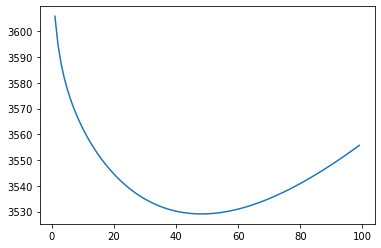

In [27]:
list_lambda = [i for i in np.arange(1, 100, 1)]
list_err = [ridge_method(lambda_val=lambda_val, X_train_fold=X_train_fold, Y_train_fold=Y_train_fold, X_test_fold=X_test_fold, Y_test_fold=Y_test_fold, k_fold=5) for lambda_val in list_lambda]

# print(list_err)
plt.figure()
plt.plot(list_lambda, list_err)
plt.show()

In [28]:
print(f'La valeur de lambda pour le risque le plus bas est : {list_lambda[list_err.index(min(list_err))]}')
print(f'Le risque de prédiction associé est : {min(list_err)}')

La valeur de lambda pour le risque le plus bas est : 48
Le risque de prédiction associé est : 3529.0620498144503


### Question 12

In [29]:
reg_lasso = sklearn.linear_model.LassoCV(cv=5).fit(X_train, y_train)
residual_lasso = y_test - reg_lasso.predict(X_test)
print(f'Le paramètre de régularisation de LASSO est : {reg_lasso.alpha_}')
print(f'Méthode Lasso | Valeur du risque : {np.sum((residual_lasso) ** 2) / len(y_test)}')

Le paramètre de régularisation de LASSO est : 4.019584539262709
Méthode Lasso | Valeur du risque : 3104.674170598809


### Question 13

In [30]:
lasso_var = np.nonzero(reg_lasso.coef_)[0]
print(f'Les variables sélectionnées par la méthode Lasso sont : {lasso_var}. Il y en a {len(lasso_var)}')

Les variables sélectionnées par la méthode Lasso sont : [ 23  42  44  82  83  85  95  98 115 122 124 132 136]. Il y en a 13


In [31]:
leastsqlassoX_train = X_train.iloc[:,lasso_var]
leastsqlassoX_test = X_test.iloc[:, lasso_var]
reg_leastsqlasso = sklearn.linear_model.LinearRegression().fit(leastsqlassoX_train, y_train)
residual_leastsqlasso = y_test.values - reg_leastsqlasso.predict(leastsqlassoX_test)
print(f'Méthode Least-Square Lasso | Valeur du risque : {np.sum((residual_leastsqlasso) ** 2) / len(y_test)}')

Méthode Least-Square Lasso | Valeur du risque : 3244.149716769895


### Question 14

In [32]:
true_lasso_var = [22, 82, 23, 132, 154, 79, 115, 73, 122, 13]
lasso_intersect_var = list(set(np.nonzero(reg_lasso.coef_)[0]).intersection(true_lasso_var))

print(f'Parmi le jeu initial, la méthode lasso a retrouvé : {lasso_intersect_var}, soit {len(lasso_intersect_var)} / {len(true_lasso_var)}')

Parmi le jeu initial, la méthode lasso a retrouvé : [132, 82, 115, 23, 122], soit 5 / 10
